# Preparing the environment

## Graphics and plotting

The following block of code initializes the Python plotting library [matplotlib](http://matplotlib.org/gallery.html) and configures it to show figures embedded in the notebook (as opposed to opening a new window for each figure):

In [2]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt

The Seaborn library provides easy-to-use plotting functions for common plot types, and better default visual styles.

In [3]:
import seaborn as sea

Set the default size and style of the plot.  (Plots are styled to [look like R's `ggplot`](http://tonysyu.github.io/mpltools/auto_examples/style/plot_ggplot.html) library.)

In [4]:
matplotlib.rcParams['figure.figsize'] = (10, 7)

sea.set_style('dark')

Also make the NumPy library available (without it, some features of Matplotlib and -especially- Seaborn) will *not* work:

In [5]:
import numpy as np

## SQL database connection

The ESC403 cluster comes preinstalled with [Catherine Devlin's `%sql`-magic for IPython][1]; this allows you to run SQL queries from the IPython notebook, and intermix them with Python code.

[1]: https://github.com/catherinedevlin/ipython-sql

Before we can use the `%sql` syntax, two steps must be taken:

* Load the IPython-SQL bridge code

In [6]:
%load_ext sql

* Connect to an actual database; this must be the first `%sql` statement (the `rmurri@/equidistantpoints` syntax means "connect to the PostGreSQL DB named `equidistantpoints` running on *this* host as user `rmurri`" -- of course change `rmurri` to *your* user name):

In [7]:
%sql postgresql://rmurri@/equidistantpoints

u'Connected: rmurri@equidistantpoints'

This database contains the [Equidistant Geographic Grid Points and Modern Climate](http://mypage.iu.edu/~pdpolly/Data.html) dataset (this the "extended North American data" in the words of the source website), imported into the PostGreSQL server running on this machine with a modified version of the [`mysql-postgresql-converter` script](https://github.com/lanyrd/mysql-postgresql-converter).

The [original publication](http://mypage.iu.edu/~pdpolly/Data.html) describes the dataset thusly:

> Database of equidistant grid points covering the globe at 25 km, 50 km, and 100 km intervals. A separate table of points just for the continent of North America is provided, with an ID that links each point into the global 50 km grid.
> 
> A detailed set of North American 50 km points is available with the following data linked to the 50 km grid by the point's ID number:
> 
> * Elevation from "TerrainBase Global Land Elevation and Ocean Depth" from the National Geophysical Data Center and World Data Centers-A for Solid Earth Geophysics and for Marine Geology and Geophysics (NGDC/WDC-A)
> * Precipitation and Temperature from "Global Air Temperature and Precipitation: Regridded Monthly and Annual Climatologies" from Wilmott, Matsuura and Legates, Center for Climatic Research, University of Delaware.
> * Macrovegetation cover from Matthews, 1984. "Prescription of Land-surface Boundary Conditions in GISS GCM II: A Simple Method Based on High-resolution Vegetation Data Sets". NASA TM-86096.
> * Ecoregions from R.G. Bailey, "Ecoregions of North America", Rocky Mountain Research Station, US Forest Service, Fort Collins, Colorado.
> * Bioclimatic variables on temperature, seasonality, precipitation, etc. from the WorldClim Global Climate Data set compiled by Hijmans et al., 2005.
>
> The gridpoints themselves and the data compilation may be cited as "Polly, P.D.  2010. Tiptoeing through the trophics: geographic variation in carnivoran locomotor ecomorphology in relation to environment.  Pp. 374-410 in A. Goswami and A. Friscia (eds.), Carnivoran Evolution: New Views on Phylogeny, Form, and Function."


Let us then explore the tables to get a "feeling" of the data here (**Note:** this query is non-standard and will only run on the PostgreSQL RDBMS):

In [8]:
%sql select table_name from information_schema.tables where table_schema = 'public';

8 rows affected.


table_name
naecoregionsbailey
natempwilmott
navegcovermatthews
na50kmpoints
naaltterrainbase
nabioclimvars
naprecipwilmott
northamerica50kmpoints


In [9]:
%sql select * from na50kmpoints limit 3;

3 rows affected.


id,globalid,longitude,latitude,lamy,lamx
1,103148,-42.17270,83.26264,0.11278,0.94127
2,103149,-38.34420,83.26264,0.11749,0.94691
3,103150,-34.51560,83.26264,0.12169,0.95277


In [24]:
%sql select * from naaltterrainbase limit 3;

3 rows affected.


id,globalid,longitude,latitude,altitude
6,None,-79.46900,82.81348,460.00000
7,None,-75.87860,82.81348,980.00000
8,None,-72.28820,82.81348,520.00000


In [11]:
%sql select * from nabioclimvars limit 3;

3 rows affected.


id,globalid,bio1,bio2,bio3,bio4,bio5,bio6,bio7,bio8,bio9,bio10,bio11,bio12,bio13,bio14,bio15,bio16,bio17,bio18,bio19
1,103148,-17.32920,6.45830,16.43340,1239.56640,3.80000,-35.50000,39.30000,-2.93330,-30.66670,-0.60000,-30.66670,150.00000,23.00000,7.00000,45.06160,62.00000,24.00000,52.00000,24.00000
2,103149,-16.92080,6.75830,17.24060,1230.63450,4.10000,-35.10000,39.20000,-2.61670,-28.98330,-0.35000,-30.13330,140.00000,22.00000,7.00000,45.84400,58.00000,22.00000,49.00000,23.00000
3,103150,-17.19170,6.90000,17.64710,1234.91780,3.80000,-35.30000,39.10000,-2.81670,-21.51670,-0.53330,-30.36670,141.00000,22.00000,6.00000,43.26290,57.00000,23.00000,49.00000,24.00000


In [12]:
%sql select * from navegcovermatthews limit 3;

3 rows affected.


globalid,longitude,latitude,vegid,vegdescrip
6,-79.46900,82.81300,31,ice
7,-75.87900,82.81300,31,ice
8,-72.28800,82.81300,31,ice


In [13]:
%sql select * from naprecipwilmott limit 3;

3 rows affected.


id,longitude,latitude,jan,feb,mar,apr,may,jun,jul,aug,sep,oct,nov,dec,annualprecip
6,-79.46900,82.81348,6.80000,4.40000,6.90000,5.00000,8.10000,7.70000,16.20000,20.50000,16.10000,10.00000,6.90000,5.50000,113.80000
7,-75.87860,82.81348,7.30000,4.60000,7.30000,5.30000,8.60000,8.10000,16.80000,20.70000,17.10000,10.10000,7.00000,6.00000,119.00000
8,-72.28820,82.81348,7.70000,4.70000,7.70000,5.80000,9.10000,8.70000,17.70000,21.10000,18.50000,10.50000,7.10000,6.50000,125.10000


----

## 1. What is the average altitude where vegetation type is "ice"?

In [30]:
#%sql select latitude from naaltterrainbase limit 100;
%sql select  avg(naaltterrainbase.altitude) from naaltterrainbase  ,  navegcovermatthews where navegcovermatthews.vegdescrip='ice' and naaltterrainbase.longitude = navegcovermatthews.longitude and  naaltterrainbase.latitude = navegcovermatthews.latitude ;
#np.mean(result)

1 rows affected.


avg
None


## 2. What is the average altitude for each vegetation type?

In [49]:
%sql select navegcovermatthews.vegdescrip, avg(naaltterrainbase.altitude) from naaltterrainbase  ,  navegcovermatthews where naaltterrainbase.longitude = navegcovermatthews.longitude and  naaltterrainbase.latitude = navegcovermatthews.latitude    GROUP BY vegdescrip

4 rows affected.


vegdescrip,avg
meadow,1147.0000000000000000
drought-deciduous shrubland/thicket,1298.0000000000000000
tall/medium/short grassland,1128.5000000000000000
cold-deciduous forest,211.5000000000000000


## 3. What is the most frequent vegetation type by altitude?

In [56]:
%sql select navegcovermatthews.vegdescrip, count(naaltterrainbase.altitude) from naaltterrainbase  ,  navegcovermatthews where naaltterrainbase.longitude = navegcovermatthews.longitude and  naaltterrainbase.latitude = navegcovermatthews.latitude    GROUP BY vegdescrip  ORDER BY count(naaltterrainbase.altitude)  DESC

4 rows affected.


vegdescrip,count
tall/medium/short grassland,4
cold-deciduous forest,2
meadow,1
drought-deciduous shrubland/thicket,1


## 4. Is there a correlation between altitude and precipitation?

(It's enough to show with a plot that a correlation exists or not.)

8509 rows affected.


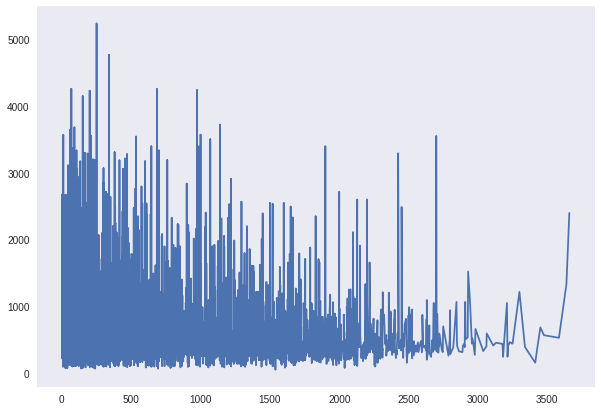

In [67]:
result = %sql select  naaltterrainbase.altitude, naprecipwilmott.annualprecip from naaltterrainbase  ,  naprecipwilmott where naaltterrainbase.longitude = naprecipwilmott.longitude and  naaltterrainbase.latitude = naprecipwilmott.latitude ORDER BY naaltterrainbase.altitude ;

altitude, precipitation = zip(*result)

plt.plot(altitude, precipitation)